In [12]:
library(ggseqlogo)
library(patchwork)
library(ggplot2)

In [3]:
# copied from Aff_vs_conc_footprints_all_TFs.ipynb
TF_ORDER = c('ATF2', 'FOXC2', 'MEF2D', 'CEBPA', 'IRF1', 'NFKB1', 'RUNX3', 'NFIC', 'FOSL2', 'TWST1', 'SOX15', 'PO5F1', 'POU3F2', 'SP2', 'EGR2', 'KLF3', 'ETS1', 'AP2A', 'COE1', 'SIX1', 'TEAD4', 'RFX2', 'ZIC3', 'CTCF', 'NFYB', 'NRF1', 'ZN143', 'REST', 'TEAD1', 'GRHL1')

In [22]:
pwms = list()
widths = c()
for (x in TF_ORDER) {
    pwms[[x]] = t(read.table(sprintf("./Supp/virtual_footprints/motifs/%s.tsv", x)))
    rownames(pwms[[x]]) = c("A","C","G","T")
    widths = c(widths, ncol(pwms[[x]]))
}

In [23]:
max(widths)

[1] 28

In [32]:
plots = list() 
i = 1
for (x in TF_ORDER) {
    plots[[i]] = wrap_plots(plot_spacer(), 
                            ggseqlogo(pwms[[x]]) + theme_void(),
                            plot_spacer(), heights = c(1,6,1))
    i = i +1
}

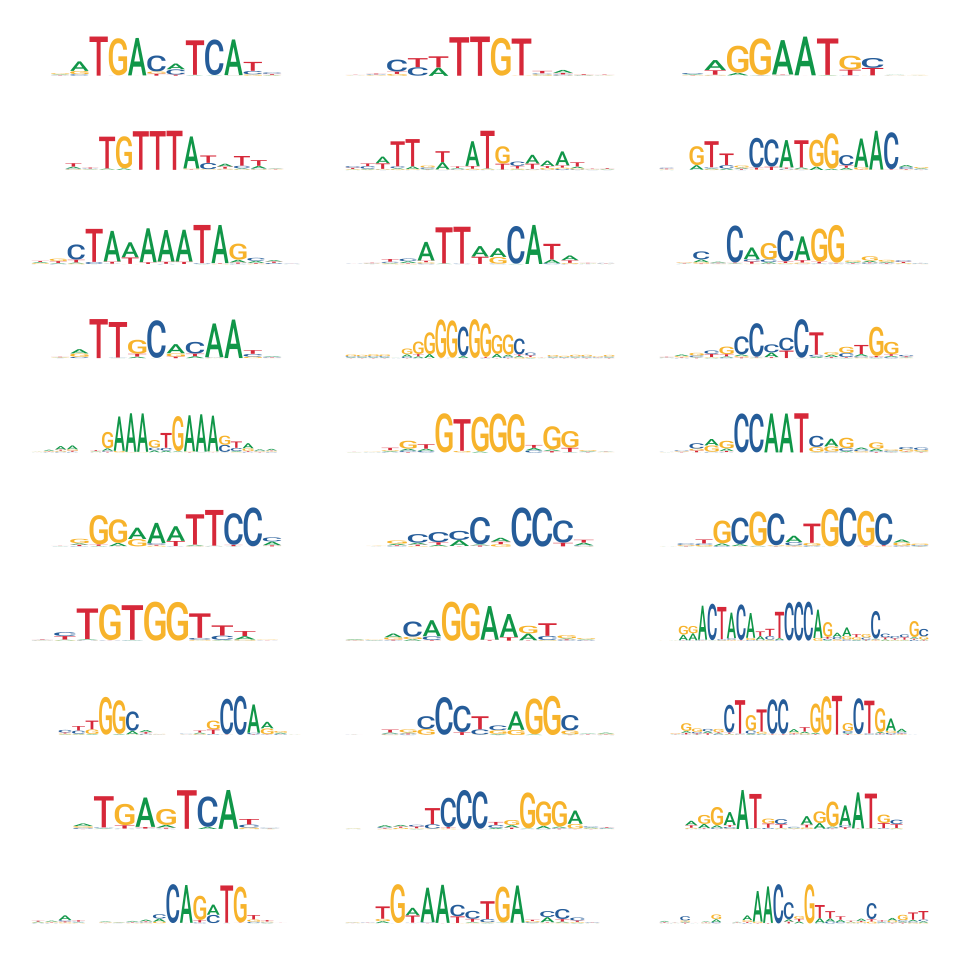

In [33]:
options(repr.plot.width=8, repr.plot.height=8)
p = wrap_plots(plots, nrow = 10, byrow=F)
p

In [34]:
ggsave(p, file="./Supp/virtual_footprints/plots/motifs.pdf", width=8, height=6)